# Visualizing the Game Of Thrones Universe 

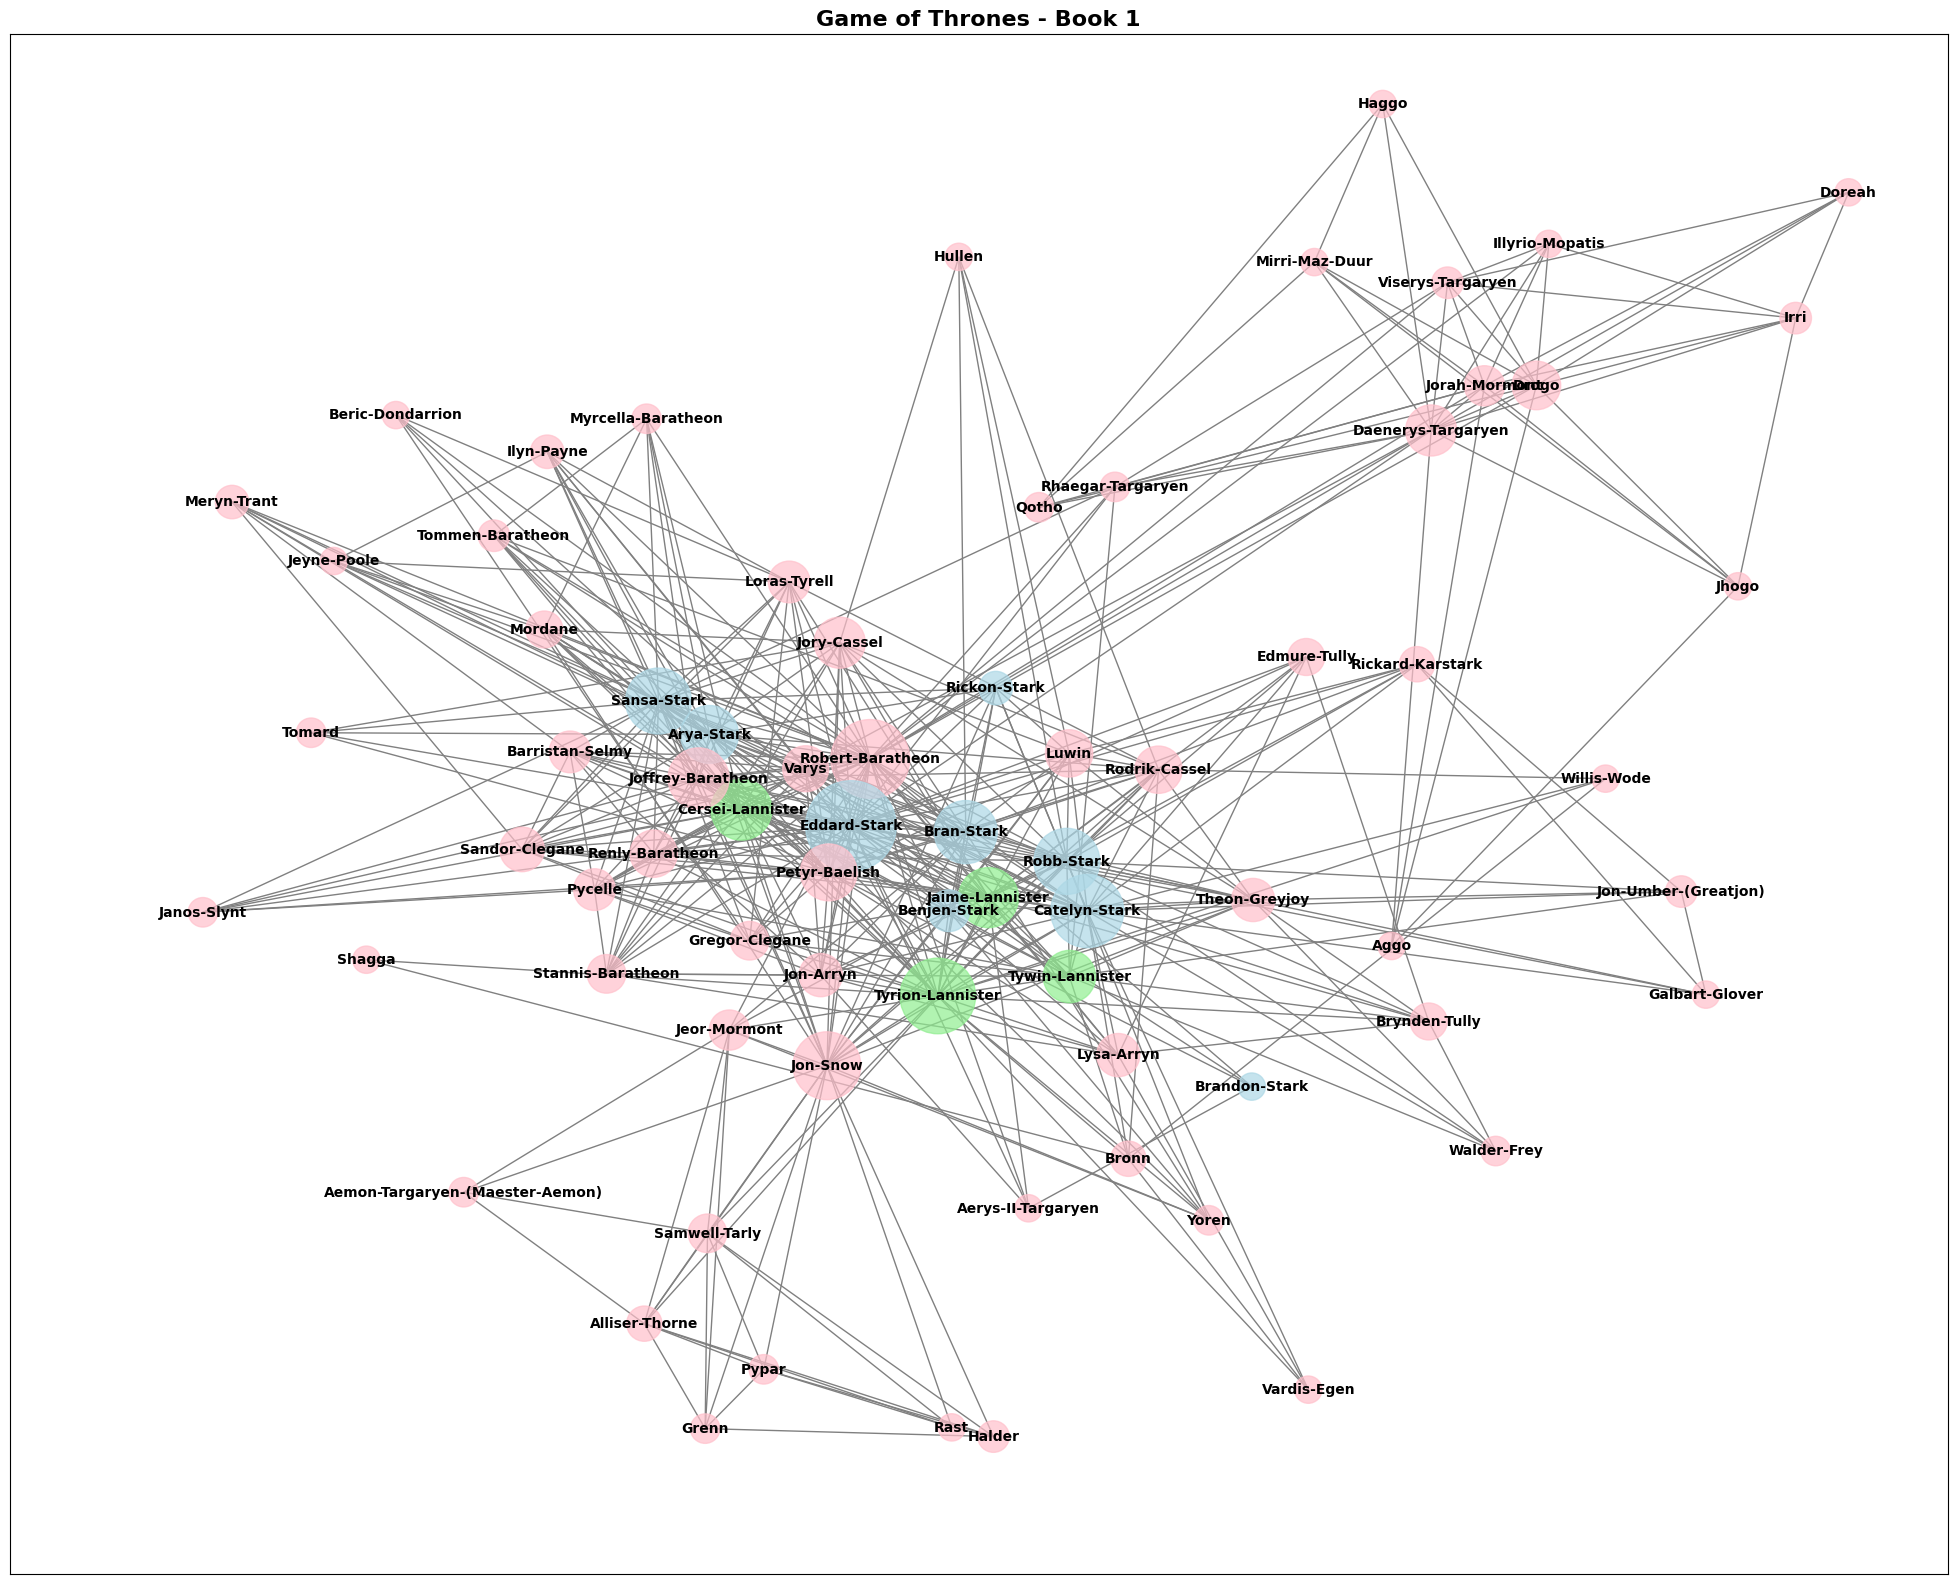

In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Reading in datasets/book1.csv
book1 = pd.read_csv('book1.csv')

# Creating an empty graph object
G_book1 = nx.Graph()

# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight']*5)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G_book1)

# Set threshold for degree centrality
threshold = 0.03

# Get nodes to keep
nodes_to_keep = [n for n in G_book1.nodes() if degree_centrality[n] >= threshold]

# Create subgraph with only selected nodes
G_book1_sub = G_book1.subgraph(nodes_to_keep)

# Define node sizes and colors
node_sizes = [degree_centrality[n] * 12000 for n in G_book1_sub.nodes()]
node_colors = ['lightblue' if 'Stark' in n else 'lightgreen' if 'Lannister' in n else 'pink' for n in G_book1_sub.nodes()]

# Define edge colors and widths
edge_colors = ['grey' for u, v, d in G_book1_sub.edges(data=True)]

# Create plot figure
fig, ax = plt.subplots(figsize=(25, 20))

# Draw nodes and edges
pos = nx.spring_layout(G_book1_sub, k=2.2)
nx.draw_networkx_nodes(G_book1_sub, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G_book1_sub, pos, edge_color=edge_colors)

# Add node labels
node_labels = {n: n.split(' ')[-1] for n in G_book1_sub.nodes()}
nx.draw_networkx_labels(G_book1_sub, pos, labels=node_labels, font_size=10, font_weight='bold')

# Set plot limits and remove axes
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_xticks([])
ax.set_yticks([])

# Add plot title
plt.title("Game of Thrones - Book 1", fontsize=16, fontweight='bold')

# Show plot
plt.show()


# Most Important Characters

In [46]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## The evolution of character importance
<p>According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens... ;)</p>
<p>Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.</p>

<AxesSubplot: >

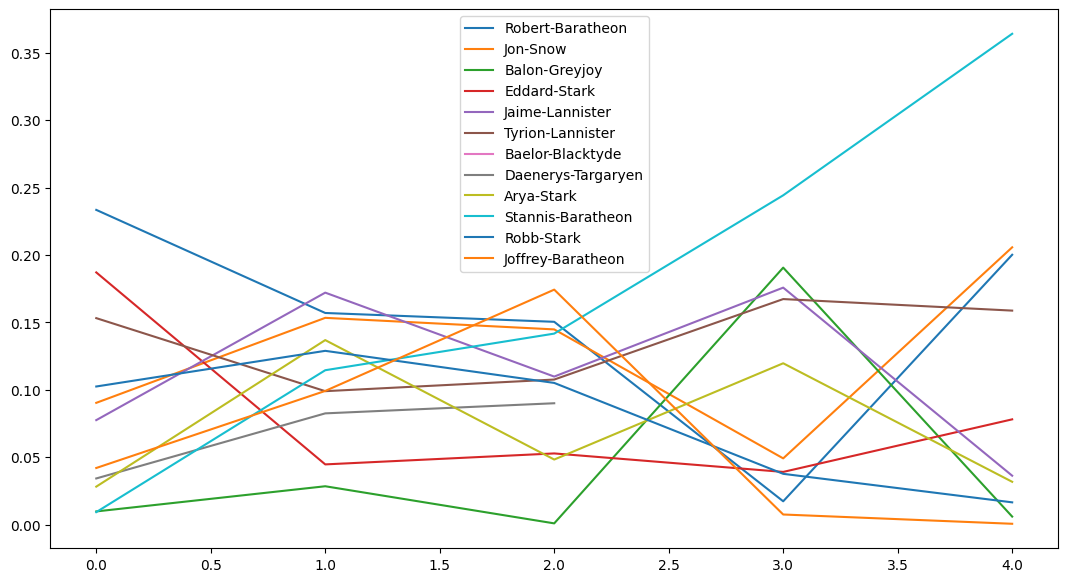

In [48]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))